In [1]:
import pandas as pd 
df=pd.read_csv("categorised.csv")
t=df["PARTICULARS"]
t=t.apply(lambda x:x.lower())
text =t.replace(regex=True).apply(lambda x:x.replace("/"," ").replace("@"," "))
labels = {"institute":"salary",
           "uma":"fund transfer","radha":"fund transfer","sanjay":"fund transfer","jemy":"fund transfer","swati":"fund transfer","pragati":"fund transfer","atul":"fund transfer","hiruthick":"fund transfer",
          "amazon": "shopping", "flipkart": "shopping",
          "swiggy":"food","zomato":"food","dinner":"food","snacks":"food","lunch":"food","tea":"food","q72482598":"food",
          "fees":"fees",
          "rent":"bills","electricity":"bills","recharge":"bills","topup":"bills","phone":"bills","kiran":"bills",
          "ppf":"investments","stock":"investments","crpto":"investments",
          "cash":"cash","atm":"cash",
          "auto":"travel","petrol":"travel","flight":"travel","irctc":"travel",
          "dmart":"utilities","grofers":"utilities","stores":"utilities","medicine":"utilities","pharmacy":"utilities"
         }
labs = []
for i in text:
    f = 0
    for j in list(labels.keys()):
        if j in i:
            labs.append(labels[j])
            f = 1
            break
    if f == 0:
        labs.append("miscellaneous")
print(len(labs))


134


In [87]:
d=df["DEPOSITS"]
w=df["WITHDRAWALS"]
sal=0
shop=0
fd=0
fee=0
bill=0
inv=0
cash=0
fund=0
tl=0
ut=0
mis=0
exp=0
j=0
node_size=[0]*12


for i in labs:
    if(i=="salary"):
        sal=sal+d[j]-w[j]
    if(i=="shopping"):
        shop=shop+d[j]-w[j]
    if(i=="food"):
        fd=fd+d[j]-w[j]
    if(i=="fees"):
        fee=fee+d[j]-w[j]
    if(i=="bills"):
        bill=bill+d[j]-w[j]
    if(i=="investments"):
        inv=inv+d[j]-w[j]
    if(i=="cash"):
        cash=cash+d[j]-w[j]
    if(i=="fund transfer"):
        fund=fund+d[j]-w[j]
    if(i=="travel"):
        tl=tl+d[j]-w[j]
    if(i=="utilities"):
        ut=ut+d[j]-w[j]
    if(i=="miscellaneous"):
        mis=mis+d[j]-w[j]
        
    exp=exp+d[j]-w[j]
    j=j+1


In [85]:
node_color =[]*12
node_size[0]=abs(sal)/5
node_color.append('green')
node_size[1]=abs(exp)/5
node_color.append('white')
node_size[2]=abs(fund)/5
if(fund>0):
    node_color.append('green')
else:
    node_color.append('red')
node_size[3]=abs(shop)/5
node_color.append('red')
node_size[4]=abs(fee)/5
node_color.append('red')
node_size[5]=abs(bill)/5
node_color.append('red')
node_size[6]=abs(inv)/5
if(inv>0):
    node_color.append('green')
else:
    node_color.append('red')
node_size[7]=abs(cash)/5
node_color.append('red')
node_size[8]=abs(tl)/5
node_color.append('red')
node_size[9]=abs(ut)/5
node_color.append('red')
node_size[10]=abs(mis)/5
node_color.append('red')
node_size[11]=abs(fd)/5
node_color.append('red')


In [82]:
amount = {
        'salary' : sal,
        'fund transfer' : fund,
        'food' : fd,
        'fees' : fee,
        'bills' : bill,
        'travel' : tl,
        'utilities' : ut,
        'investments' : inv,
        'cash' : cash,
        'travel' : tl,
        'shopping' : shop,
        'miscellaneous' : mis
        }


{'salary': 35760.0, 'fund transfer': 23476.0, 'food': -1352.0, 'fees': -64850.0, 'bills': -9000.0, 'travel': -9852.92, 'utilities': -308.0, 'investments': -5000.0, 'cash': -7000.0, 'shopping': -798.0, 'miscellaneous': -9687.0}


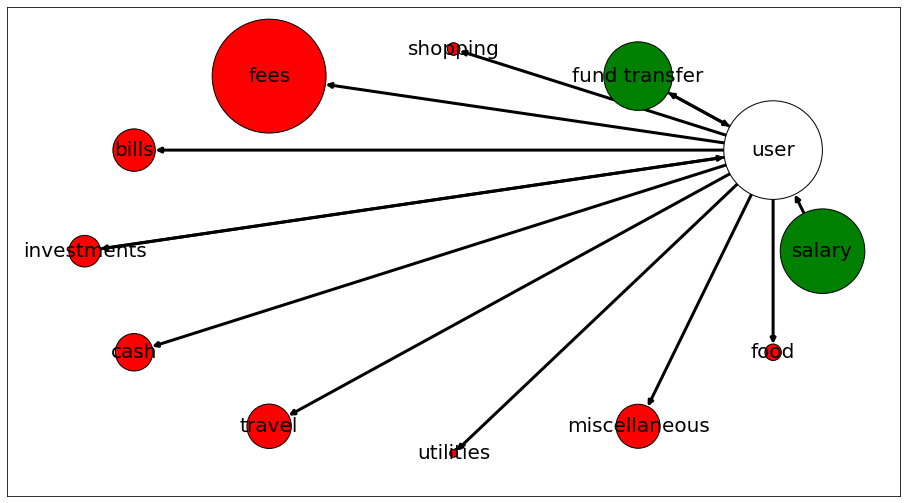

In [83]:
import networkx as nx
G = nx.DiGraph()
import matplotlib.pyplot as plt
plt.figure(figsize =(16,9)) 
edges = [('salary', 'user'),  
('user', 'fund transfer'),
('fund transfer','user'),
('user', 'shopping'),
('user', 'fees'),
('user', 'bills'),
('user', 'investments'),
('investments','user'),
('user', 'cash'),
('user', 'travel'),
('user', 'utilities'),
('user', 'miscellaneous'),
('user', 'food')]
options = {
    "font_size": 20,
    "edgecolors": "black",
    "width": 3,
}
G.add_edges_from(edges)
pos = nx.circular_layout(G)
nx.draw_networkx(G,pos,with_labels = True,node_size=node_size,node_color=node_color, **options)
print(amount)